# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

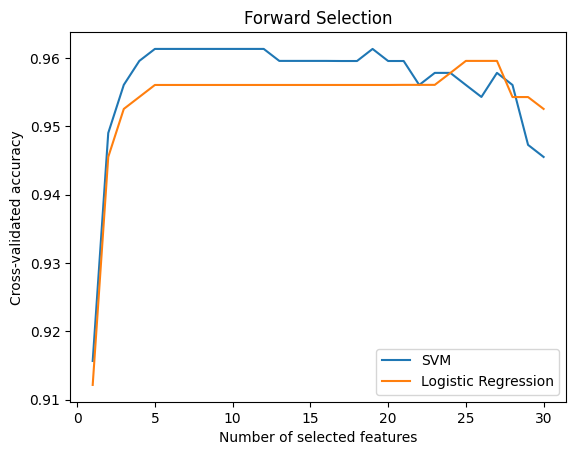

In [ ]:
def forward_selection(X, y, model):
    n_features = X.shape[1]
    selected_features = []
    remaining_features = list(range(n_features))
    scores = []

    for i in range(n_features):
        best_score = 0
        best_feature = None
        for feature in remaining_features:
            features_to_test = selected_features + [feature]
            X_subset = X[:, features_to_test]
            score = np.mean(cross_val_score(model, X_subset, y, cv=5))
            if score > best_score:
                best_score = score
                best_feature = feature

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        scores.append(best_score)

    return selected_features, scores

svm_model = SVC(kernel='linear')
logreg_model = LogisticRegression(max_iter=10000)

svm_selected, svm_scores = forward_selection(X, y, svm_model)
logreg_selected, logreg_scores = forward_selection(X, y, logreg_model)



######
plt.plot(range(1, len(svm_scores) + 1), svm_scores, label='SVM')
plt.plot(range(1, len(logreg_scores) + 1), logreg_scores, label='Logistic Regression')
plt.xlabel('Number of selected features')
plt.ylabel('Cross-validated accuracy')
plt.title('Forward Selection')
plt.legend()
plt.show()


# Backward elimination (2pts)

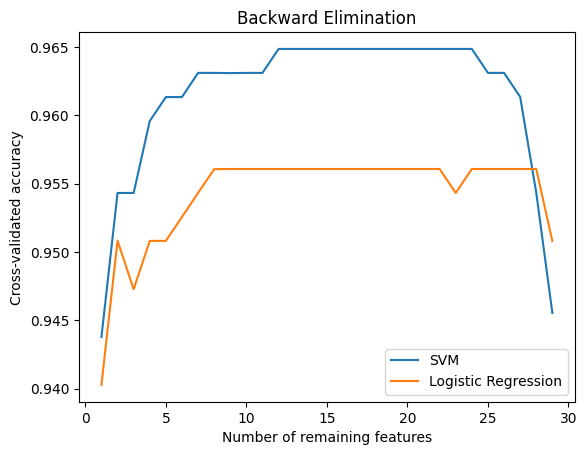

In [ ]:
def backward_elimination(X, y, model):
    n_features = X.shape[1]
    remaining_features = list(range(n_features))
    scores = []

    for i in range(n_features, 1, -1):
        X_subset = X[:, remaining_features]
        score = np.mean(cross_val_score(model, X_subset, y, cv=5))
        scores.append(score)

        best_score = 0
        worst_feature = None
        for feature in remaining_features:
            features_to_test = [f for f in remaining_features if f != feature]
            if len(features_to_test) > 0:
                X_subset = X[:, features_to_test]
                score = np.mean(cross_val_score(model, X_subset, y, cv=5))
                if score > best_score:
                    best_score = score
                    worst_feature = feature

        if worst_feature is not None:
            remaining_features.remove(worst_feature)

    return remaining_features, scores[::-1]

svm_model = SVC(kernel='linear')
logreg_model = LogisticRegression(max_iter=10000)

svm_remaining, svm_scores_back = backward_elimination(X, y, svm_model)
logreg_remaining, logreg_scores_back = backward_elimination(X, y, logreg_model)



##########
plt.plot(range(1, len(svm_scores_back) + 1), svm_scores_back, label='SVM')
plt.plot(range(1, len(logreg_scores_back) + 1), logreg_scores_back, label='Logistic Regression')
plt.xlabel('Number of remaining features')
plt.ylabel('Cross-validated accuracy')
plt.title('Backward Elimination')
plt.legend()
plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

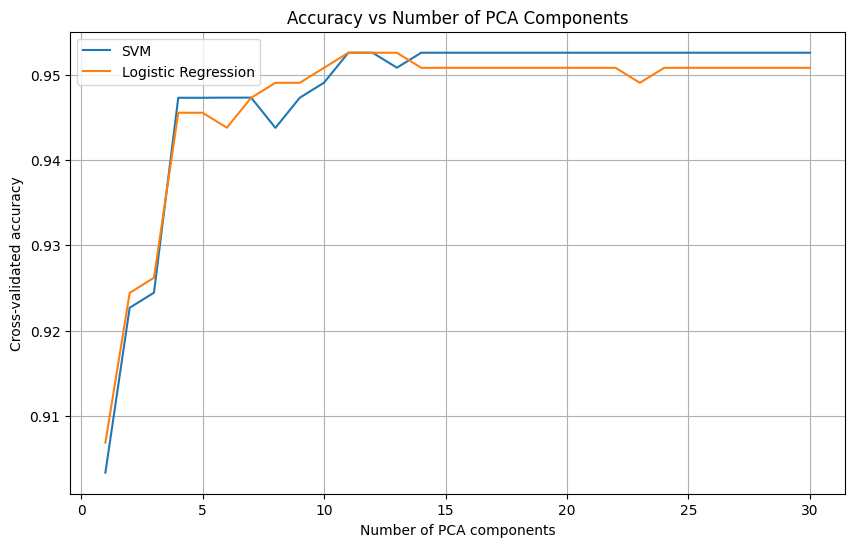

In [ ]:

# колво призн
n_features = X.shape[1]

# мемори
svm_accuracies = []
logreg_accuracies = []

# перебор количества
comp_range = range(1, n_features + 1)

for n_components in comp_range:
    pca = decomposition.PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    svm_model = SVC(kernel='linear')
    logreg_model = LogisticRegression(max_iter=10000)
    svm_score = np.mean(cross_val_score(svm_model, X_reduced, y, cv=5))
    svm_accuracies.append(svm_score)
    logreg_score = np.mean(cross_val_score(logreg_model, X_reduced, y, cv=5))
    logreg_accuracies.append(logreg_score)





########
plt.figure(figsize=(10, 6))
plt.plot(comp_range, svm_accuracies, label='SVM')
plt.plot(comp_range, logreg_accuracies, label='Logistic Regression')
plt.xlabel('Number of PCA components')
plt.ylabel('Cross-validated accuracy')
plt.title('Accuracy vs Number of PCA Components')
plt.legend()
plt.grid(True)
plt.show()


#  Выводы (1pts)

In [ ]:
#Forward selection и Backward Elimination при простом переборе признаков без PCA:
  #SVM показывает себя лучше, чем логистической регрессии, если не перебрать с количеством признаков. К потере информации более устойчивой оказалась SVM.
#PCA:
  #При размерности 15 и более SVM показывает себя лучше. При размерностях 14 и менее SVM показывает плохуя устойчивость к потере признаков, а вот сохраняя большинство
  #информации (благодаря PCA), логистичнеская регрессия выглядит лучше.